In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from wordcloud import WordCloud
import numpy as np
import umap
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display


In [2]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ella\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Ella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Load the original dataset
file_path = "News_Category_Dataset_v3.json"  # Update with actual path
df = pd.read_json(file_path, lines=True)

# Data Cleaning and Preprocessing
print(f"Number of rows in original dataset: {df.shape[0]}")
print(f"Number of columns in original dataset: {df.shape[1]}")
display(df.head())

df = df.applymap(lambda x: None if isinstance(x, str) and x.strip() == '' else x.strip() if isinstance(x, str) else x)
print(f"Null values in each column:\n{df.isnull().sum()}")
print(f"Number of duplicated rows: {df.duplicated().sum()}")

df = df.dropna(subset=['headline', 'short_description'])
df = df.drop_duplicates()
df = df[df['date'].dt.year.isin(range(2017, 2023))]
print(f"Number of rows after cleaning: {df.shape[0]}")
print(f"Number of columns after cleaning: {df.shape[1]}")

df['text'] = df[['headline', 'short_description']].astype(str).apply(lambda x: ' '.join(x), axis=1)

Number of rows in original dataset: 209527
Number of columns in original dataset: 6


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


C:\Users\Ella\AppData\Local\Temp\ipykernel_9852\1545133483.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: None if isinstance(x, str) and x.strip() == '' else x.strip() if isinstance(x, str) else x)


Null values in each column:
link                     0
headline                 6
category                 0
short_description    19712
authors              37418
date                     0
dtype: int64
Number of duplicated rows: 13
Number of rows after cleaning: 47010
Number of columns after cleaning: 6


In [4]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation & numbers
    text = re.sub(r'\btrump\b', '', text)  # Remove "trump"
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['processed_text'] = df['text'].apply(preprocess_text)

In [5]:
# Tokenization, Stopword Removal, and Lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])

df['filtered_text'] = df['processed_text'].apply(tokenize_and_lemmatize)

In [6]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=6000, stop_words='english', max_df=0.5, min_df=5, ngram_range=(1,2))
X = vectorizer.fit_transform(df['filtered_text'])


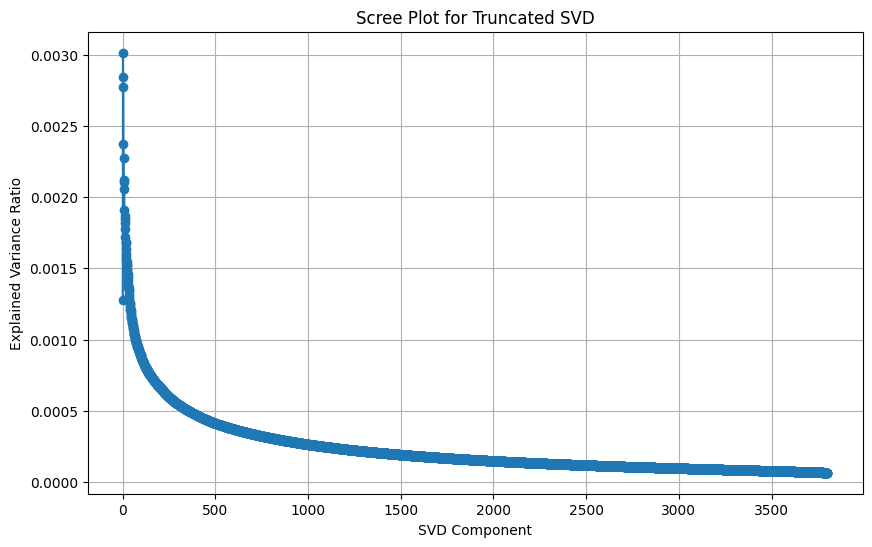

Component 1: 0.001281
Component 2: 0.003013
Component 3: 0.002845
Component 4: 0.002771
Component 5: 0.002370
Component 6: 0.002274
Component 7: 0.002118
Component 8: 0.002107
Component 9: 0.002058
Component 10: 0.001908
Component 11: 0.001866
Component 12: 0.001845
Component 13: 0.001820
Component 14: 0.001778
Component 15: 0.001720
Component 16: 0.001687
Component 17: 0.001679
Component 18: 0.001638
Component 19: 0.001600
Component 20: 0.001581
Component 21: 0.001559
Component 22: 0.001541
Component 23: 0.001526
Component 24: 0.001522
Component 25: 0.001492
Component 26: 0.001491
Component 27: 0.001460
Component 28: 0.001440
Component 29: 0.001415
Component 30: 0.001392
Component 31: 0.001369
Component 32: 0.001360
Component 33: 0.001348
Component 34: 0.001337
Component 35: 0.001309
Component 36: 0.001297
Component 37: 0.001274
Component 38: 0.001259
Component 39: 0.001248
Component 40: 0.001238
Component 41: 0.001214
Component 42: 0.001208
Component 43: 0.001206
Component 44: 0.0011

In [14]:
# Dimensionality Reduction using Truncated SVD
svd = TruncatedSVD(n_components=min(X.shape[1], 3800), random_state=42)
X_svd = svd.fit_transform(X).astype(np.float32)

# Explained variance by each component
explained_variance = svd.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('SVD Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for Truncated SVD')
plt.grid(True)
plt.show()

# Print the values plotted in the scree plot
for i, var in enumerate(explained_variance, start=1):
    print(f"Component {i}: {var:.6f}")

# Total explained variance
total_explained_variance = explained_variance.sum()
print(f"Total explained variance by selected components: {total_explained_variance:.4f}")